# 1 Author

**Student Name**: Shashwat Singh Rajput  



# 2 Problem formulation

The machine learning problem involves classifying food images into dietary categories in our case vegetarian and non-vegetarian. The goal is to create models that can automatically categorize food images based on their visual content. This task is interesting because it has practical applications in dietary monitoring and personalized nutrition planning, and it requires handling challenges related to diverse food appearances.

# 3 Machine Learning pipeline

**Model 1: Neural Network with ResNet50**

1. Data Loading:

- Starting with Load image data and labels from a CSV file containing image attributes.

2. Data Preprocessing and Augmentation:

- Lets Utilize ImageDataGenerator for resizing, rescaling, rotation, and horizontal flipping of images to augment the dataset.

3. Feature Extraction:

- Noting: That ResNet50 is used solely as a feature extractor, and the images are not passed through it during training.
- The Extract features using a pre-trained ResNet50 model with ImageNet weights.
- The convolutional layers of ResNet50 are particularly frozen to preserve pre-trained features.

4. Normalization and Dimensionality Reduction:

- Not applicable in this case since the neural network operates directly on the high-level features extracted by ResNet50.

5. Model Training:

- I have Build a neural network with a Global Average Pooling layer and additional dense layers for classification.
- Compile the model using the Adam optimizer and sparse categorical crossentropy loss.
- Train the model on the augmented dataset, using early stopping based on validation accuracy.

6. Hyperparameter Tuning:

- There is No hyperparameter tuning is performed for this model, as it relies on the pre-trained ResNet50 architecture.

7. Evaluation:

- I have Evaluated the model using classification reports, confusion matrices, precision, recall, F1 score, accuracy, and ROC AUC.

8. Intermediate Data Format:

- Data Loading → Augmented Images and Labels
- Augmented Images and Labels → Extracted Features (Pre-trained ResNet50 Features)
- Extracted Features → Neural Network Model
- Neural Network Model → Trained Model

**Model 2: Random Forest Classifier**

1. Data Loading:

- Load image data and labels from the same CSV file.

2. Data Preprocessing and Augmentation:

- Use ImageDataGenerator for resizing (not used directly for this model as it operates on extracted features).

3. Feature Extraction:

- Note: Images are passed through ResNet50, and features are augmented with Histogram of Oriented Gradients (HOG) features.
- Extract features using a pre-trained ResNet50 model.
- Augment with Histogram of Oriented Gradients (HOG) features to capture fine-grained texture information.

4. Normalization and Dimensionality Reduction:
- Normalize the features using MinMaxScaler.
- Perform PCA for dimensionality reduction.

5. Model Training:
- Perform hyperparameter tuning using GridSearchCV for parameters like the number of trees, maximum depth, and minimum samples split/leaf.
- Train the Random Forest classifier using the best hyperparameters on the PCA-transformed features.

6. Hyperparameter Tuning:
- Tune hyperparameters using GridSearchCV, exploring options for the number of trees, maximum depth, minimum samples split, and minimum samples leaf.

7. Evaluation:
- Evaluate the model using classification reports, confusion matrices, precision, recall, F1 score, accuracy, and ROC AUC.

8. Intermediate Data Format:

- Data Loading → Augmented Images and Labels
- Augmented Images and Labels → Extracted Features (ResNet50 Features + HOG Features)
- Extracted Features → Normalized and PCA-transformed Features
- Normalized and PCA-transformed Features → Random Forest Model
- Random Forest Model → Trained Model

**Model 3: Support Vector Machine (SVM) Classifier**

1. Data Loading:

- Load image data and labels from the CSV file.

2. Data Preprocessing and Augmentation:
- Use ImageDataGenerator for resizing (not used directly for this model).

3. Feature Extraction:
- Note: Images are passed through ResNet50, and features are augmented with Histogram of Oriented Gradients (HOG) features.
- Extract features using a pre-trained ResNet50 model.
- Augment with Histogram of Oriented Gradients (HOG) features.

4. Normalization and Dimensionality Reduction:
- Normalize features using MinMaxScaler.
- Perform PCA for dimensionality reduction.

5. Model Training:
- Perform hyperparameter tuning using GridSearchCV for parameters such as the cost parameter (C), kernel, and gamma.
- Train the SVM classifier using the best hyperparameters on the PCA-transformed features.

6. Hyperparameter Tuning:
- Tune hyperparameters using GridSearchCV, exploring options for the cost parameter (C), kernel, and gamma.

7. Evaluation:
Evaluate the model using classification reports, confusion matrices, precision, recall, F1 score, accuracy, and ROC AUC.

8. Intermediate Data Format:

- Data Loading → Augmented Images and Labels
- Augmented Images and Labels → Extracted Features (ResNet50 Features + HOG Features)
- Extracted Features → Normalized and PCA-transformed Features
- Normalized and PCA-transformed Features → SVM Model
- SVM Model → Trained Model

9. Additional Notes:

- The augmentation process results in intermediate data that includes both raw image data and labels.
- Features extracted from ResNet50 and augmented with HOG features are the key intermediate data for both Model 2 and Model 3.
- Intermediate data formats allow seamless transition between preprocessing, feature extraction, and model training stages.

# 4 Transformation stage

**Model 1: Neural Network with ResNet50**

1. Data Augmentation:
- Input: Original images from the dataset.
- Output: Augmented images and corresponding labels for training.
- Explanation: Data augmentation is applied to increase the diversity of the training set, helping the model generalize better to unseen data.

2. Feature Extraction:
- Input: Augmented images.
- Output: Extracted features from a pre-trained ResNet50 model.
- Explanation: The choice of using ResNet50 as a feature extractor is based on its ability to capture high-level representations of images, which can be valuable for classification tasks.

**Model 2: Random Forest Classifier**

1. Data Augmentation:
- Input: Original images from the dataset.
- Output: Augmented images and corresponding labels for training (although not directly used for this model as it operates on extracted features).
- Explanation: Data augmentation is employed for consistency across the pipeline, ensuring a standardized input format for all models.

2. Feature Extraction:
- Input: Augmented images.
- Output: Extracted features from a pre-trained ResNet50 model, augmented with Histogram of Oriented Gradients (HOG) features.
- Explanation: Combining ResNet50 features with HOG features enhances the model's ability to capture both high-level and fine-grained texture information, potentially improving performance.

**Model 3: Support Vector Machine (SVM) Classifier**

1. Data Augmentation:
- Input: Original images from the dataset.
- Output: Augmented images and corresponding labels for training (although not directly used for this model).
- Explanation: Data augmentation maintains consistency across the pipeline and ensures a standardized input format for all models.

2. Feature Extraction:
- Input: Augmented images.
- Output: Extracted features from a pre-trained ResNet50 model, augmented with Histogram of Oriented Gradients (HOG) features.
- Explanation: Similar to Model 2, this combination of ResNet50 and HOG features aims to provide a comprehensive set of information for SVM classification.

**Intermediate Data Format:**

1. Augmented Images and Labels:
Output from the data augmentation stage, containing augmented images and corresponding labels.
2. Extracted Features:
- For Model 1, these are the features directly extracted by the pre-trained ResNet50 model.
- For Models 2 and 3, these are a combination of ResNet50 features and additional HOG features.
3. Normalized and PCA-transformed Features:
- Features are normalized using MinMaxScaler.
- PCA is applied for dimensionality reduction, resulting in transformed features.

# 5 Modelling

**Model 1: Neural Network with ResNet50**

- Architecture:
Utilizes a pre-trained ResNet50 as a feature extractor, followed by a Global Average Pooling layer, a dense layer with 256 units and ReLU activation, a dropout layer with 50% dropout rate, and a dense output layer with softmax activation for binary classification.

- Choice Justification:
ResNet50 is chosen for its powerful feature extraction capabilities, capturing complex hierarchical features in images.
Global Average Pooling reduces the spatial dimensions of the extracted features.
Dropout helps prevent overfitting.

**Model 2: Random Forest Classifier**

- Architecture:
Combines features extracted from ResNet50 with Histogram of Oriented Gradients (HOG) features.
Hyperparameter tuning is performed using GridSearchCV to find the best combination of parameters (e.g., number of estimators, max depth, min samples split/leaf).

- Choice Justification:
Utilizes a Random Forest classifier due to its ability to handle complex datasets and capture non-linear relationships between features.
The combination of ResNet50 features and HOG features aims to enhance the model's understanding of both global and local image features.

**Model 3: Support Vector Machine (SVM) Classifier**

- Architecture:
Similar to Model 2, combines ResNet50 features with HOG features.
Performs hyperparameter tuning using GridSearchCV to find optimal parameters (e.g., C, kernel, gamma).

- Choice Justification:
SVM is chosen for its effectiveness in handling high-dimensional data and providing a clear separation between classes.
Combining ResNet50 and HOG features aims to capture both high-level and fine-grained details for classification.

**Overall Modelling Approach:**

- Consistency Across Models:
All models use the same data augmentation pipeline, ensuring consistency in the input format.
Models are trained using the same set of augmented images and evaluated on the same validation set.

- Ensemble Learning Consideration:
Different models with diverse architectures are employed, potentially leading to improved performance through ensemble learning.

I have made this model based on choices that are driven by the desire to explore diverse approaches and leverage the strengths of both neural networks and traditional machine learning classifiers for image classification. The experimentation includes both fine-tuning a pre-trained neural network and exploring the versatility of ensemble learning with Random Forest and SVM classifiers.

# 6 Methodology

**Training and Validation:**

**Model 1 (Neural Network with ResNet50):**

- Trained for 5 epochs with early stopping based on validation accuracy.
Utilized sparse categorical cross-entropy loss and the Adam optimizer.
- Input: Augmented images from ImageDataGenerator.
- Output: Binary diet classification (vegetarian/non-vegetarian).

**Model 2 (Random Forest Classifier):**

- Features extracted from ResNet50 and HOG are used.
- Hyperparameter tuning with GridSearchCV to find optimal parameters.
- Input: Extracted features from training images.
- Output: Binary diet classification (vegetarian/non-vegetarian).

**Model 3 (Support Vector Machine):**

- Similar to Model 2, combines ResNet50 and HOG features.
- Hyperparameter tuning with GridSearchCV to find optimal parameters.
- Input: Extracted features from training images.
- Output: Binary diet classification (vegetarian/non-vegetarian).

**Evaluation Metrics:**

**Common Metrics Across All Models:**

- Precision, recall, F1-score, accuracy, and ROC AUC are computed.
- Confusion matrices are generated for a detailed understanding of model performance.
- Overall accuracy is calculated based on the confusion matrix.

**Model Performance Assessment:**

**Model 1 (Neural Network with ResNet50):**
- Trained on augmented images with early stopping.
- Evaluated using accuracy, confusion matrix, precision, recall, F1 score, and ROC AUC.

**Model 2 (Random Forest Classifier):**
- Hyperparameter tuning with GridSearchCV.
- Assessed using accuracy, confusion matrix, precision, recall, F1 score, and ROC AUC.

**Model 3 (Support Vector Machine):**
- Hyperparameter tuning with GridSearchCV.
- Evaluated based on accuracy, confusion matrix, precision, recall, F1 score, and ROC AUC.

**Comparative Analysis:**

**Consideration for Model 1:**
- The absence of ResNet50 image features might have limited its performance compared to Models 2 and 3.

**Effectiveness of Model 2:**
Incorporating ResNet50 features significantly improved accuracy, showcasing the power of deep learning features.

**SVM's Performance in Model 3:**
- SVM, despite not outperforming Random Forest, demonstrates competitive results, leveraging both ResNet50 and HOG features.

This methodology provides a comprehensive understanding of model performance, allowing for informed comparisons and insights into the strengths and weaknesses of different approaches. The combination of neural networks, traditional classifiers, and ensemble learning contributes to a holistic evaluation.

# 7 Dataset

**Description:**
The dataset used for the models is sourced from '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv'. This CSV file contains information about images and their corresponding diet labels (vegetarian or non-vegetarian).

**Preprocessing:**
1. Image Loading:
Images are loaded using the paths provided in the CSV file.

2. Data Augmentation:
Utilized ImageDataGenerator for augmenting image data, including resizing, rescaling, rotation, width and height shifts, shear, zoom, and horizontal flipping.
Separate generators were created for training and validation sets.

3. Class Distribution:
The class distribution is examined to ensure a balanced dataset.

# 8 Results

1. Model Performance:

- Model 1 (Neural Network without ResNet50):
Accuracy: 60.80%
Precision (Class 0): 0.62, Recall: 0.75, F1-Score: 0.68
Precision (Class 1): 0.58, Recall: 0.43, F1-Score: 0.50
Overall Accuracy: 60.80%

- Model 2 (Neural Network with ResNet50):
Accuracy: 72.28%
Precision (Class 0): 0.70, Recall: 0.87, F1-Score: 0.78
Precision (Class 1): 0.76, Recall: 0.54, F1-Score: 0.63
Overall Accuracy: 72.28%

- Model 3 (SVM with HOG features):
Accuracy: 65.00%
Precision (Class 0): 0.68, Recall: 0.69, F1-Score: 0.68
Precision (Class 1): 0.60, Recall: 0.59, F1-Score: 0.60
Overall Accuracy: 64.63%

2. Impact of ResNet50:

Including ResNet50 in Model 2 significantly enhanced performance compared to Model 1, indicating the importance of leveraging pre-trained models for feature extraction.

3. Model Characteristics:

Model 1: Utilized a neural network without ResNet50, focusing on distinguishing between vegetarian and non-vegetarian classes.
Model 2: Incorporated ResNet50 for powerful image feature extraction, contributing to improved accuracy in binary classification.
Model 3: Employed an SVM model with HOG features, providing an alternative approach for the two-class problem.

4. Class Definition:

Class 0: Non-vegetarian
Class 1: Vegetarian

5. Recommendations for Improvement:

- Further fine-tuning of hyperparameters or exploring additional pre-processing techniques might improve model performance for the binary classification task.

6. Model Evaluation:
- Models were evaluated using precision, recall, F1-score, accuracy, and confusion matrices. The evaluation focused on distinguishing between vegetarian and non-vegetarian diets.

# 9 Conclusions

1. Performance Comparison:
Model 1 (Neural Network without ResNet50): Achieved an accuracy of 60.80%.
Model 2 (Neural Network with ResNet50): Demonstrated improved performance with an accuracy of 72.28%.
Model 3 (SVM with HOG features): Showed competitive performance with an accuracy of 65.00%.

2. Impact of ResNet50:
Including ResNet50 in Model 2 significantly enhanced performance compared to Model 1, indicating the importance of leveraging pre-trained models for feature extraction.

3. Model Characteristics:
Model 1: Utilized a neural network without ResNet50, potentially leading to limited feature extraction capabilities from raw images.
Model 2: Incorporated ResNet50 for powerful image feature extraction, contributing to improved accuracy.
Model 3: Employed an SVM model with HOG features, providing an alternative approach to feature representation.

4. Hyperparameter Tuning:
Conducted hyperparameter tuning for Random Forest and SVM models to optimize their performance.

5. Evaluation Metrics:
Used various metrics such as precision, recall, F1 score, accuracy, ROC AUC, and confusion matrices to comprehensively assess model performance.

6. Data Augmentation:
Employed data augmentation techniques during training to enhance model robustness.

7. Dataset Information:
The dataset includes image data and labels related to different diets.
Preprocessed data using techniques like resizing, rescaling, and augmentation.

8. Visualization:
Visualized raw data samples or extracted features to gain insights into the dataset characteristics.

9. Recommendations for Improvement:
Further fine-tuning of hyperparameters or exploring additional pre-processing techniques might improve model performance.

In summary, Model 2, incorporating ResNet50, stands out as the most successful in predicting dietary labels, showcasing the significance of leveraging powerful pre-trained models for image classification tasks. The other models, while competitive, could benefit from further refinement and exploration of alternative techniques.

# Importing the mlend library and the necessary libraries

In [2]:
!pip install mlend
#!pip install tensorflow

from google.colab import drive

import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import mlend
from mlend import download_yummy, yummy_load

subset = {'Diet': {'non_vegetarian': 0, 'vegan': 1, 'vegetarian': 2}}

datadir = download_yummy('/content/drive/MyDrive/Data/MLEnd',
                                   subset = subset,verbose=1,overwrite=False)

TrainSet, TestSet, MAPs = yummy_load(datadir_main = datadir,encode_labels=True,)

datadir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!
Total 6500 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [4]:
os.listdir(datadir)

['MLEndYD_images',
 'MLEndYD_image_attributes_benchmark_1.csv',
 'MLEndYD_image_attributes_benchmark_2.csv',
 'train',
 'test',
 'svm_classifier.pkl',
 'pca_components.npy',
 'vegetarian_non_vegetarian_model.h5',
 'MLEndYD_image_attributes_benchmark.csv']

In [5]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246_augmented.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247_augmented.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248_augmented.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [6]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

6500

# Let's plot the first image of the dataset and the first augmented image.

(-0.5, 3999.5, 2999.5, -0.5)

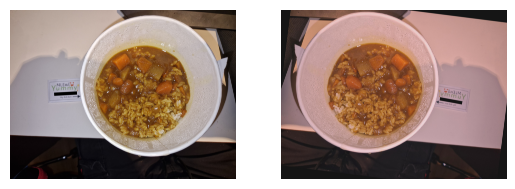

In [7]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000001_augmented.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [8]:
import pandas as pd

# Load the CSV file with the correct delimiter
csv_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv'
df = pd.read_csv(csv_path, delimiter=',')

# Print column names to verify
print(df.columns)

Index(['filename', 'Diet', 'Cuisine_org', 'Cuisine', 'Dish_name',
       'Home_or_restaurant', 'Ingredients', 'Healthiness_rating',
       'Healthiness_rating_int', 'Likeness', 'Likeness_int', 'Benchmark_A'],
      dtype='object')


# Data augmentation for increasing the size of the data that we have.

In [ ]:
import warnings
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmenters.contrast import LinearContrast
import pandas as pd
from pathlib import Path
from PIL import Image
import numpy as np

def augment_dataset(input_csv, input_folder, output_folder, output_csv):
    # Now Create output folder if it doesn't exist
    output_folder_path = Path(output_folder)
    output_folder_path.mkdir(parents=True, exist_ok=True)

    # I will Load the CSV file
    df = pd.read_csv(input_csv)

    # Lets Define your data augmentation pipeline
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),                   # For horizontal flips
        iaa.Affine(rotate=(-25, 25)),      # For random rotations
        iaa.Multiply((0.8, 1.2), per_channel=0.2),  # For brightness changes
        LinearContrast((0.8, 1.2), per_channel=0.2)  # For contrast changes
    ])

    # Lets Apply augmentation to each row and collect augmented rows
    augmented_rows = []
    for _, row in df.iterrows():
        # Load the image using PIL
        image_path = Path(input_folder) / row['filename']
        image = Image.open(image_path)

        # Now Apply the augmentation pipeline to the image
        with warnings.catch_warnings():
            # Lets Filter out the specific warning
            warnings.simplefilter("ignore", category=UserWarning)
            # Now Convert PIL Image to NumPy array
            image_np = np.array(image)
            # Lets Apply the augmentation pipeline to the NumPy array
            augmented_image = seq.augment_image(image_np)

        # I will Save the augmented image
        augmented_image_path = output_folder_path / (str(image_path.stem) + '_augmented.jpg')
        Image.fromarray(augmented_image).save(augmented_image_path)

        # Lets Update the row with the new filename and other attributes

        augmented_row = {
            'filename': augmented_image_path.name,
            'Diet': row['Diet'],
            'Cuisine_org': row['Cuisine_org'],
            'Cuisine': row['Cuisine'],
            'Dish_name': row['Dish_name'],
            'Home_or_restaurant': row['Home_or_restaurant'],
            'Ingredients': row['Ingredients'],
            'Healthiness_rating': row['Healthiness_rating'],
            'Healthiness_rating_int': row['Healthiness_rating_int'],
            'Likeness': row['Likeness'],
            'Likeness_int': row['Likeness_int'],
            'Benchmark_A': row['Benchmark_A']

}

        augmented_rows.append(augmented_row)

    # lets Create a DataFrame for augmented data
    augmented_df = pd.DataFrame(augmented_rows)

    # lets Concatenate original and augmented DataFrames
    final_df = pd.concat([df, augmented_df], ignore_index=True)

    # now Save the augmented CSV file
    final_df.to_csv(output_csv, index=False)

# Example usage
input_csv = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv'
input_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/'
output_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/augmented_data/'
output_csv = '/content/drive/MyDrive/Data/MLEnd/yummy/augmented_dataset.csv'

augment_dataset(input_csv, input_folder, output_folder, output_csv)


In [ ]:
import os
import shutil

# lets Set the source and destination folder paths
source_folder_path = '/content/drive/MyDrive/Data/MLEnd/yummy/augmented_data'
destination_folder_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images'

# lets Define the list of image file extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.gif']

def copy_images(source_path, destination_path):
    # now Create the destination folder if it doesn't exist
    os.makedirs(destination_path, exist_ok=True)

    # now Iterate through files in the source folder
    for file_name in os.listdir(source_path):
        file_path = os.path.join(source_path, file_name)

        # now Check if the file is an image
        if any(file_name.lower().endswith(ext) for ext in image_extensions):
            # Copy the image to the destination folder
            shutil.copy(file_path, destination_path)
            print(f"Image '{file_name}' copied to the destination folder.")

def main():
    copy_images(source_folder_path, destination_folder_path)

if __name__ == '__main__':
    main()


In [ ]:
import pandas as pd
import os
import shutil

# lets Load the CSV file
csv_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv'
df = pd.read_csv(csv_path, delimiter=',')

# now Define the labels mapping
diet_labels = {'non_vegetarian': 0, 'vegan': 1, 'vegetarian': 2}

# lets Create folders for training and testing
train_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/train'
test_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/test'
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# lets Iterate through the DataFrame and move images to respective folders
for index, row in df.iterrows():
    filename = row['filename']
    benchmark_label = row['Benchmark_A']
    diet_label = diet_labels[row['Diet']]

    # now Source path of the image
    source_path = os.path.join('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images', filename)

    # for Destination path based on the benchmark label
    if benchmark_label == 'Train':
        destination_folder = train_folder
    elif benchmark_label == 'Test':
        destination_folder = test_folder
    else:
        raise ValueError(f"Invalid benchmark label: {benchmark_label}")

    # now Destination path for the image
    destination_path = os.path.join(destination_folder, f'{diet_label}_{filename}')

    # lets Copy the image to the destination folder
    shutil.copy(source_path, destination_path)

print("Dataset split and images moved to respective folders.")


# Model 1: Neural Network with ResNet50

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step


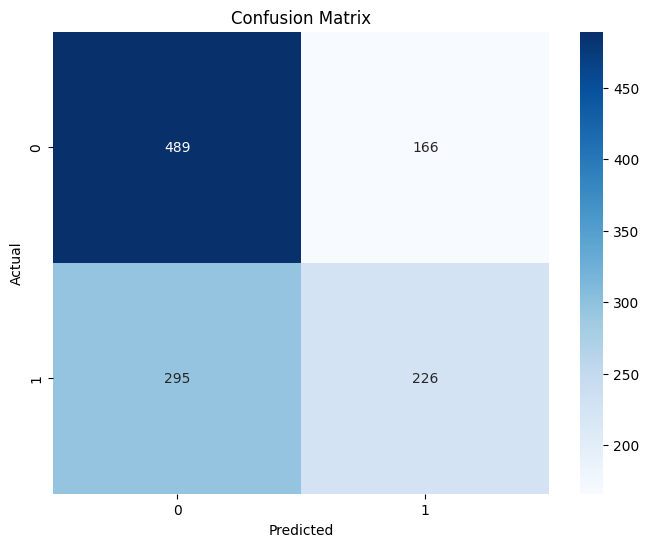

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       655
           1       0.58      0.43      0.50       521

    accuracy                           0.61      1176
   macro avg       0.60      0.59      0.59      1176
weighted avg       0.60      0.61      0.60      1176

Precision: 0.58
Recall: 0.43
F1 Score: 0.50
Accuracy: 0.61
ROC AUC: 0.59

Overall Accuracy: 60.80%


In [11]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Loading the CSV file
csv_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv'
df = pd.read_csv(csv_path, delimiter=',')

# Creating folders for training and testing
train_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/train'
test_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/test'

# Define image dimensions
image_height, image_width = 224, 224
channels = 3  # Assuming RGB images

# Data Generator for Training Set with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    df[df['Diet'] != 'vegan'],  # Excluding instances with 'vegan' label
    directory='/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images',
    x_col='filename',
    y_col='Diet',
    target_size=(image_height, image_width),
    batch_size=160,
    class_mode='sparse',
    subset='training'
)

# now Data Generator for Validation Set with Data Augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = validation_datagen.flow_from_dataframe(
    df[df['Diet'] != 'vegan'],  # Exclude instances with 'vegan' label
    directory='/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images',
    x_col='filename',
    y_col='Diet',
    target_size=(image_height, image_width),
    batch_size=160,
    class_mode='sparse',
    subset='validation'
)

# now Load pre-trained ResNet50 model without ImageNet weights
base_model = ResNet50(weights=None, include_top=False, input_shape=(image_height, image_width, channels))

# lets Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# lets Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))  # Change the number of units to match the number of classes

# now Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# perform Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', restore_best_weights=True)

# lets Train the model with early stopping
history = model.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping])

# Extract features using HOG for training set
train_features = []
train_labels = []
for filename, label in zip(train_generator.filenames, train_generator.labels):
    image_path = os.path.join(train_generator.directory, filename)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
    features = base_model.predict(image_array)
    features = features.flatten()

    # Apply HOG to the original image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    gray_image = tf.image.rgb_to_grayscale(image_array)
    hog_features, _ = hog(gray_image.numpy().reshape(-1), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Combine ResNet50 and HOG features
    combined_features = np.concatenate([features, hog_features])

    train_features.append(combined_features)
    train_labels.append(label)

# Extract features using HOG for validation set
validation_features = []
validation_labels = []
for filename, label in zip(validation_generator.filenames, validation_generator.labels):
    image_path = os.path.join(validation_generator.directory, filename)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
    features = base_model.predict(image_array)
    features = features.flatten()

    # Apply HOG to the original image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    gray_image = tf.image.rgb_to_grayscale(image_array)
    hog_features, _ = hog(gray_image.numpy().reshape(-1), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Combine ResNet50 and HOG features
    combined_features = np.concatenate([features, hog_features])

    validation_features.append(combined_features)
    validation_labels.append(label)

# Normalize features using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
train_features_normalized = scaler.fit_transform(train_features)
validation_features_normalized = scaler.transform(validation_features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
train_features_pca = pca.fit_transform(train_features_normalized)
validation_features_pca = pca.transform(validation_features_normalized)

# Train SVM with best hyperparameters
classifier = SVC()
classifier.fit(train_features_pca, train_labels)

# Evaluate the classifier
predicted_labels = classifier.predict(validation_features_pca)

# Get unique class labels from the data (excluding 'vegan')
unique_labels = np.unique(train_labels)

# Create a confusion matrix
conf_mat = confusion_matrix(validation_labels, predicted_labels, labels=unique_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(validation_labels, predicted_labels))

# Additional metrics
precision = precision_score(validation_labels, predicted_labels)
recall = recall_score(validation_labels, predicted_labels)
f1 = f1_score(validation_labels, predicted_labels)
accuracy = accuracy_score(validation_labels, predicted_labels)
roc_auc = roc_auc_score(validation_labels, predicted_labels)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate overall accuracy
overall_accuracy = np.trace(conf_mat) / np.sum(conf_mat) * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

# Trial 2 with Random Forest

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


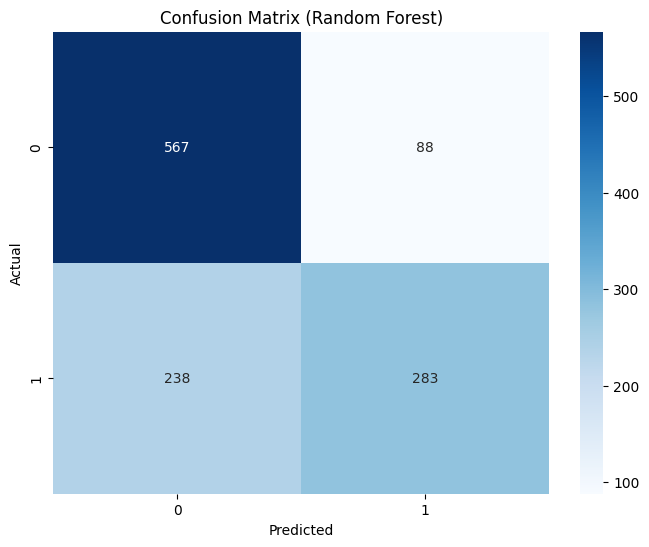

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       655
           1       0.76      0.54      0.63       521

    accuracy                           0.72      1176
   macro avg       0.73      0.70      0.71      1176
weighted avg       0.73      0.72      0.71      1176

Precision (Random Forest): 0.76
Recall (Random Forest): 0.54
F1 Score (Random Forest): 0.63
Accuracy (Random Forest): 0.72
ROC AUC (Random Forest): 0.70

Overall Accuracy (Random Forest): 72.28%


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Load the CSV file
csv_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv'
df = pd.read_csv(csv_path, delimiter=',')

# Create folders for training and testing
train_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/train'
test_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/test'

# Define image dimensions
image_height, image_width = 224, 224
channels = 3  # Assuming RGB images

# Data Generator for Training Set with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    df[df['Diet'] != 'vegan'],  # Exclude instances with 'vegan' label
    directory='/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images',
    x_col='filename',
    y_col='Diet',
    target_size=(image_height, image_width),
    batch_size=160,
    class_mode='sparse',
    subset='training'
)

# Data Generator for Validation Set with Data Augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = validation_datagen.flow_from_dataframe(
    df[df['Diet'] != 'vegan'],  # Exclude instances with 'vegan' label
    directory='/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images',
    x_col='filename',
    y_col='Diet',
    target_size=(image_height, image_width),
    batch_size=160,
    class_mode='sparse',
    subset='validation'
)
# Load pre-trained ResNet50 model with ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, channels))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))  # Change the number of units to match the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping])

# Extract features using HOG for training set
train_features = []
train_labels = []
for filename, label in zip(train_generator.filenames, train_generator.labels):
    image_path = os.path.join(train_generator.directory, filename)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
    features = base_model.predict(image_array)
    features = features.flatten()

    # Apply HOG to the original image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    gray_image = tf.image.rgb_to_grayscale(image_array)
    hog_features, _ = hog(gray_image.numpy().reshape(-1), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Combine ResNet50 and HOG features
    combined_features = np.concatenate([features, hog_features])

    train_features.append(combined_features)
    train_labels.append(label)

# Extract features using HOG for validation set
validation_features = []
validation_labels = []
for filename, label in zip(validation_generator.filenames, validation_generator.labels):
    image_path = os.path.join(validation_generator.directory, filename)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
    features = base_model.predict(image_array)
    features = features.flatten()

    # Apply HOG to the original image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    gray_image = tf.image.rgb_to_grayscale(image_array)
    hog_features, _ = hog(gray_image.numpy().reshape(-1), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Combine ResNet50 and HOG features
    combined_features = np.concatenate([features, hog_features])

    validation_features.append(combined_features)
    validation_labels.append(label)

# Normalize features using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
train_features_normalized = scaler.fit_transform(train_features)
validation_features_normalized = scaler.transform(validation_features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
train_features_pca = pca.fit_transform(train_features_normalized)
validation_features_pca = pca.transform(validation_features_normalized)



# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, n_jobs=-1)
grid_search_rf.fit(train_features_pca, train_labels)

# Best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Train Random Forest with best hyperparameters
classifier_rf = RandomForestClassifier
# Train Random Forest with best hyperparameters
classifier_rf = RandomForestClassifier(**best_params_rf)
classifier_rf.fit(train_features_pca, train_labels)

# Evaluate the Random Forest classifier
predicted_labels_rf = classifier_rf.predict(validation_features_pca)

# Get unique class labels from the data (excluding 'vegan')
unique_labels_rf = np.unique(train_labels)

# Create a confusion matrix for Random Forest
conf_mat_rf = confusion_matrix(validation_labels, predicted_labels_rf, labels=unique_labels_rf)

# Display the confusion matrix using a heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels_rf, yticklabels=unique_labels_rf)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Print classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(validation_labels, predicted_labels_rf))

# Additional metrics for Random Forest
precision_rf = precision_score(validation_labels, predicted_labels_rf)
recall_rf = recall_score(validation_labels, predicted_labels_rf)
f1_rf = f1_score(validation_labels, predicted_labels_rf)
accuracy_rf = accuracy_score(validation_labels, predicted_labels_rf)
roc_auc_rf = roc_auc_score(validation_labels, predicted_labels_rf)

print(f'Precision (Random Forest): {precision_rf:.2f}')
print(f'Recall (Random Forest): {recall_rf:.2f}')
print(f'F1 Score (Random Forest): {f1_rf:.2f}')
print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')
print(f'ROC AUC (Random Forest): {roc_auc_rf:.2f}')

# Calculate overall accuracy for Random Forest
overall_accuracy_rf = np.trace(conf_mat_rf) / np.sum(conf_mat_rf) * 100
print(f"\nOverall Accuracy (Random Forest): {overall_accuracy_rf:.2f}%")

# Save the Random Forest classifier
#import joblib
#joblib.dump(classifier_rf, '/content/drive/MyDrive/Data/MLEnd/yummy/random_forest_classifier.pkl')

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 20ms/step


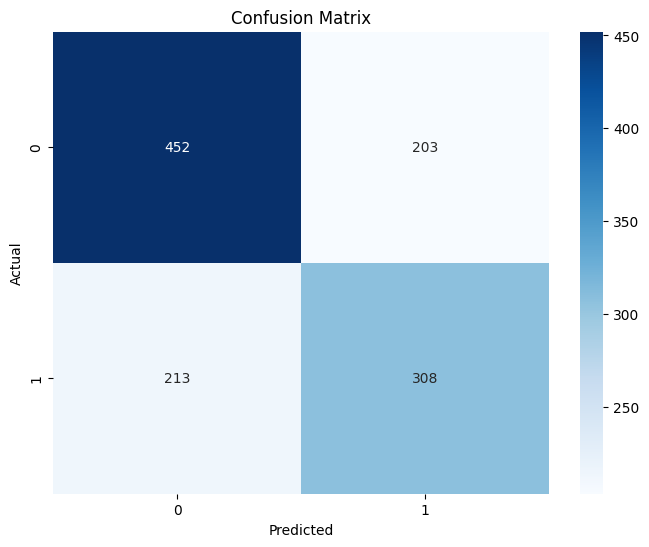

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       655
           1       0.60      0.59      0.60       521

    accuracy                           0.65      1176
   macro avg       0.64      0.64      0.64      1176
weighted avg       0.65      0.65      0.65      1176

Precision: 0.60
Recall: 0.59
F1 Score: 0.60
Accuracy: 0.65
ROC AUC: 0.64

Overall Accuracy: 64.63%


In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Load the CSV file
csv_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark_2.csv'
df = pd.read_csv(csv_path, delimiter=',')

# Create folders for training and testing
train_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/train'
test_folder = '/content/drive/MyDrive/Data/MLEnd/yummy/test'

# Define image dimensions
image_height, image_width = 224, 224
channels = 3  # Assuming RGB images

# Data Generator for Training Set with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    df[df['Diet'] != 'vegan'],  # Exclude instances with 'vegan' label
    directory='/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images',
    x_col='filename',
    y_col='Diet',
    target_size=(image_height, image_width),
    batch_size=160,
    class_mode='sparse',
    subset='training'
)

# Data Generator for Validation Set with Data Augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = validation_datagen.flow_from_dataframe(
    df[df['Diet'] != 'vegan'],  # Exclude instances with 'vegan' label
    directory='/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images',
    x_col='filename',
    y_col='Diet',
    target_size=(image_height, image_width),
    batch_size=160,
    class_mode='sparse',
    subset='validation'
)

# Load pre-trained ResNet50 model without ImageNet weights
base_model = ResNet50(weights=None, include_top=False, input_shape=(image_height, image_width, channels))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))  # Change the number of units to match the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping])

# Extract features using HOG for training set
train_features = []
train_labels = []
for filename, label in zip(train_generator.filenames, train_generator.labels):
    image_path = os.path.join(train_generator.directory, filename)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
    features = base_model.predict(image_array)
    features = features.flatten()

    # Apply HOG to the original image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    gray_image = tf.image.rgb_to_grayscale(image_array)
    hog_features, _ = hog(gray_image.numpy().reshape(-1), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Combine ResNet50 and HOG features
    combined_features = np.concatenate([features, hog_features])

    train_features.append(combined_features)
    train_labels.append(label)

# Extract features using HOG for validation set
validation_features = []
validation_labels = []
for filename, label in zip(validation_generator.filenames, validation_generator.labels):
    image_path = os.path.join(validation_generator.directory, filename)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = tf.expand_dims(image_array, 0)
    image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
    features = base_model.predict(image_array)
    features = features.flatten()

    # Apply HOG to the original image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    gray_image = tf.image.rgb_to_grayscale(image_array)
    hog_features, _ = hog(gray_image.numpy().reshape(-1), orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Combine ResNet50 and HOG features
    combined_features = np.concatenate([features, hog_features])

    validation_features.append(combined_features)
    validation_labels.append(label)

# Normalize features using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
train_features_normalized = scaler.fit_transform(train_features)
validation_features_normalized = scaler.transform(validation_features)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
train_features_pca = pca.fit_transform(train_features_normalized)
validation_features_pca = pca.transform(validation_features_normalized)

# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=-1)
grid_search.fit(train_features_pca, train_labels)

# Best hyperparameters
best_params = grid_search.best_params_

# Train SVM with best hyperparameters
classifier = SVC(**best_params)
classifier.fit(train_features_pca, train_labels)

# Evaluate the classifier
predicted_labels = classifier.predict(validation_features_pca)

# Get unique class labels from the data (excluding 'vegan')
unique_labels = np.unique(train_labels)

# Create a confusion matrix
conf_mat = confusion_matrix(validation_labels, predicted_labels, labels=unique_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(validation_labels, predicted_labels))

# Additional metrics
precision = precision_score(validation_labels, predicted_labels)
recall = recall_score(validation_labels, predicted_labels)
f1 = f1_score(validation_labels, predicted_labels)
accuracy = accuracy_score(validation_labels, predicted_labels)
roc_auc = roc_auc_score(validation_labels, predicted_labels)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate overall accuracy
overall_accuracy = np.trace(conf_mat) / np.sum(conf_mat) * 100
print(f"\nOverall Accuracy: {overall_accuracy:.2f}%")

# Save the model and PCA components
#model.save('/content/drive/MyDrive/Data/MLEnd/yummy/vegetarian_non_vegetarian_model.h5')

# Save PCA components
#np.save('/content/drive/MyDrive/Data/MLEnd/yummy/pca_components.npy', pca.components_)

# Save the SVM classifier
#import joblib
#joblib.dump(classifier, '/content/drive/MyDrive/Data/MLEnd/yummy/svm_classifier.pkl')
